<a href="https://colab.research.google.com/github/0323ali/Machine-Learning/blob/main/text_to_image_generation_by_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text to Image Generation by Stable Diffusion

referred to this notebook.<br/>
https://www.kaggle.com/code/mvvppp/sd2-gpt2-prompt-image-gen-dataset-creation

Text to image generation is the task of generating realistic images from textual descriptions using a machine learning model. One approach to this task is to use a generative model that learns the mapping from text to images. Stable diffusion is a type of stochastic process that can be used to model the dynamics of such a generative model.

One advantage of using stable diffusion for text to image generation is that it can capture the long-range dependencies in the generative model, which are important for generating complex and realistic images. Stable diffusion can also be used to model uncertainty in the generative model, which is important for producing diverse and varied images.

Overall, stable diffusion is a promising approach to text to image generation that can produce high-quality and diverse images based on textual descriptions. However, it is still an active area of research and there are many challenges that need to be addressed, such as improving the scalability and efficiency of the generative model.

In [1]:
!pip install --upgrade diffusers transformers -q

In [2]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
from kaggle_secrets import UserSecretsClient
import matplotlib.pyplot as plt
import cv2

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

ModuleNotFoundError: No module named 'kaggle_secrets'

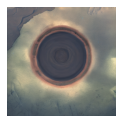

hyper realistic photo of very friendly and dystopian crater



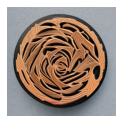

ramen carved out of fractal rose ebony, in the style of hudson river school



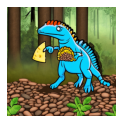

ultrasaurus holding a black bean taco in the woods, near an identical cheneosaurus



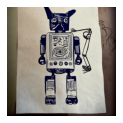

a thundering retro robot crane inks on parchment with a droopy french bulldog



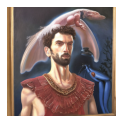

portrait painting of a shimmering greek hero, next to a loud frill-necked lizard



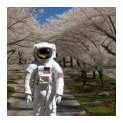

an astronaut standing on a engaging white rose, in the midst of by ivory cherry blossoms



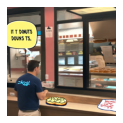

Kaggle employee Phil at a donut shop ordering all the best donuts, with a speech bubble that proclaims "Donuts. It's what's for dinner!"



In [ ]:
data=pd.read_csv('/kaggle/input/stable-diffusion-image-to-prompts/prompts.csv')
prompts=data['prompt'].tolist()
ids=data['imgId'].tolist()
dir0='/kaggle/input/stable-diffusion-image-to-prompts/images/'
for i in range(len(data)):
    img=cv2.imread(dir0+ids[i]+'.png')
    plt.figure(figsize=(2,2))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print(prompts[i])
    print()

The StableDiffusionPipeline is a class from the diffusers package in Python that allows for simulating a diffusion process on a network/graph. The diffusion process can be used to model the spread of information, diseases, or other phenomena through a network.

In [ ]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400,400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

stabilityai/stable-diffusion-2 is a Python package that provides an implementation of the stable diffusion process for modeling the diffusion of information, opinions, or other phenomena on a network or graph. It is a follow-up to the original stable-diffusion package and provides several improvements and new features.

In [ ]:
secret_hf_token = UserSecretsClient().get_secret("secret_hf_token")

Developers can access Hugging Face's API services using their own API key or token, which can be obtained by creating an account on Hugging Face's website. The API services are built on top of Hugging Face's open-source libraries, which include transformers, datasets, and tokenizers. These libraries provide a wide range of tools for building and fine-tuning NLP models.

In [ ]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token=secret_hf_token, guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

/opt/conda/lib/python3.7/site-packages/diffusers/pipelines/pipeline_utils.py:559: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that stabilityai/stable-diffusion-2 currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'stabilityai/stable-diffusion-2 is missing fp16 files' so that the correct variant file can be added.
  FutureWarning,


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Keyword arguments {'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


The code you provided is using Hugging Face's Stable Diffusion Pipeline to load a pre-trained text-to-image generation model specified by CFG.image_gen_model_id. The torch_dtype parameter is set to torch.float16 to use half-precision floating-point format, which can reduce memory usage and increase training speed on some hardware.

The revision parameter is set to "fp16", which refers to a specific version of the Stable Diffusion Pipeline that is optimized for half-precision floating-point format. This version includes performance optimizations such as reducing the size of intermediate tensors to fit in GPU memory.

The guidance_scale parameter is set to 9, which controls the strength of the guidance signal used to generate the images. A higher value for this parameter will result in more faithful image generation but may also lead to overfitting.

Overall, this code is loading a pre-trained text-to-image generation model using Hugging Face's Stable Diffusion Pipeline, and configuring it for half-precision floating-point format, authentication, and image guidance.

In [ ]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image

The generate_image function takes a text prompt and an image generation model as input and returns an image generated by the model based on the prompt.

First, the function calls the model using the prompt as input and several other parameters:

num_inference_steps: specifies the number of diffusion steps to use during image generation. More steps can result in more realistic images, but can also increase computation time and memory usage.
generator: specifies the type of generator to use for image generation. This can be either "resnet" or "stylegan2".
guidance_scale: controls the strength of the guidance signal used to generate the images.
The generated image is then retrieved from the output of the model by calling model.images[0].

Finally, the generated image is resized to CFG.image_gen_size using the resize() method and returned as the output of the function.

Overall, this function takes a prompt as input and uses an image generation model to generate an image based on the prompt, returning the generated image as output.

  0%|          | 0/35 [00:00<?, ?it/s]

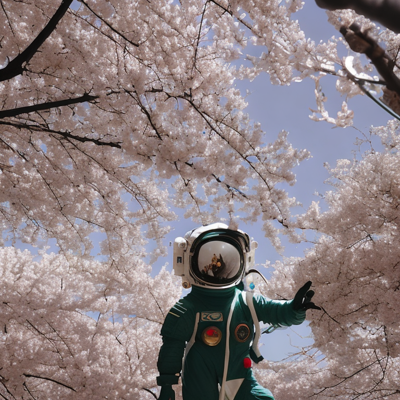

In [ ]:
generate_image("an astronaut standing on a engaging white rose, in the midst of by ivory cherry blossoms", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

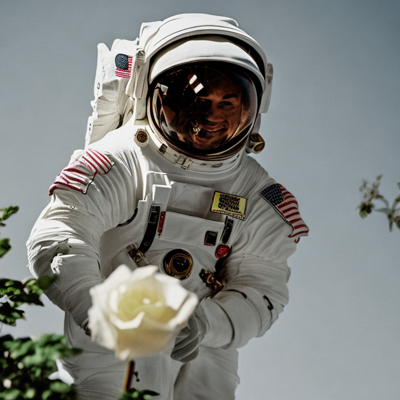

In [ ]:
generate_image("an astronaut standing on a engaging white rose", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

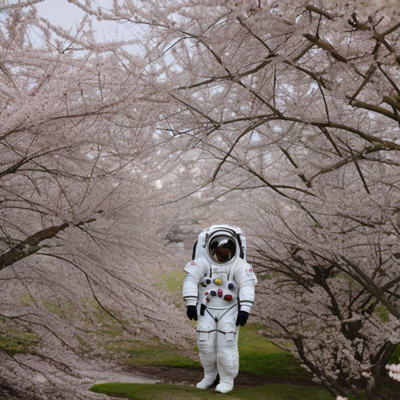

In [ ]:
generate_image("an astronaut standing in the midst of by ivory cherry blossoms", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

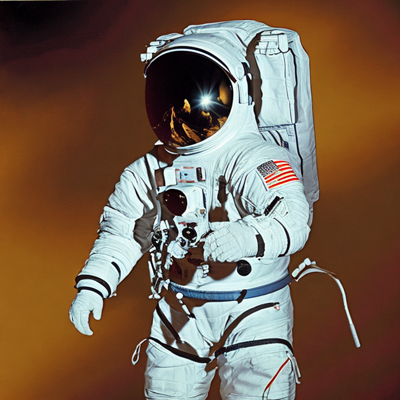

In [ ]:
generate_image("an astronaut standing", image_gen_model)

  0%|          | 0/35 [00:00<?, ?it/s]

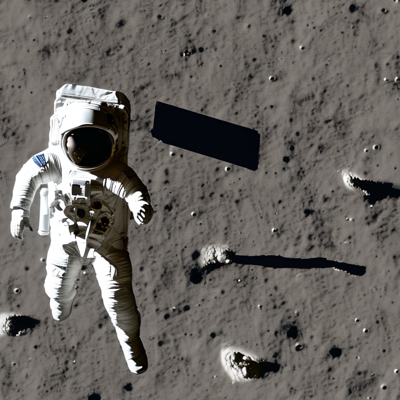

In [ ]:
generate_image("an astronaut waves goodby in the space", image_gen_model)